In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
import numpy as np
#import torch
#from d2l import torch as d2l

In [3]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

Text(0, 0.5, 'y')

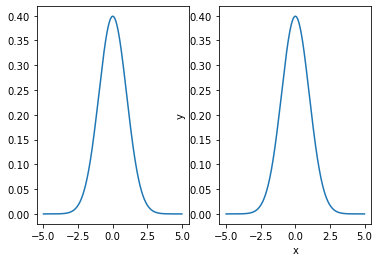

In [14]:
mu = 0
sigma = 1
X = np.arange(-5,5,0.01)
Y = np.zeros_like(X)
for k,x in enumerate(X):
    Y[k] = normal(x,mu,sigma)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.plot(X,Y)
ax = fig.add_subplot(1, 2, 2)
ax.plot(X,Y)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [ ]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [17]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.matmul(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [19]:
print('features:', features[0],'\nlabel:', labels[0])

features: [ 0.34557153 -0.54476421] 
label: [6.73722436]


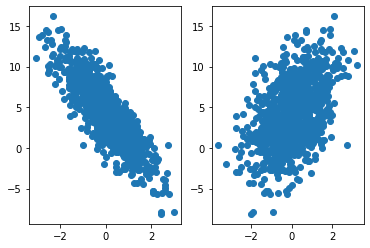

In [23]:
#d2l.set_figsize()
#d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);fig = plt.figure()
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.scatter(features[:,1],labels)
ax = fig.add_subplot(1, 2, 2)
plt.scatter(features[:,0],labels)

In [26]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    np.random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [27]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

NameError: name 'torch' is not defined